In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
def load_image(fp):
    img = cv2.imread(fp)
    return img

In [4]:
def cv_show(image,msg):
    cv2.imshow(msg,image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
def img_show(image, color):
    plt.axis("off")
    if color:
        #plt.imshow(image)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(image, cmap='gray')
    plt.show()

In [6]:
def image_resize(image, perc):
    row, col, dim = image.shape
    row_new = int(row * perc / 100)
    col_new  = int(col * perc / 100)
    dsize = (col_new, row_new)
    output = cv2.resize(image, dsize)
    return output


In [7]:
def split_color_space(image):
    b = image[:,:,0]
    g = image[:,:,1]
    r  = image[:,:,2]
    return b, g, r

In [8]:
def save_image(image, fp):
    image = image.astype(np.uint8) 
    cv2.imwrite(fp, image)

In [9]:
def color2gray(image, opt):
    if opt:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        b = 0.1140*image[:,:,0]
        g = 0.5870*image[:,:,1]
        r = 0.2989*image[:,:,2]
        gray = b + g + r
        gray = gray.astype(np.uint8) 
    return gray

In [10]:
fp = "./images/lena_color_512.png"
img = load_image(fp)

In [11]:
print(img.shape)
img = image_resize(img, 60)
print(img.shape)

(512, 512, 3)
(307, 307, 3)


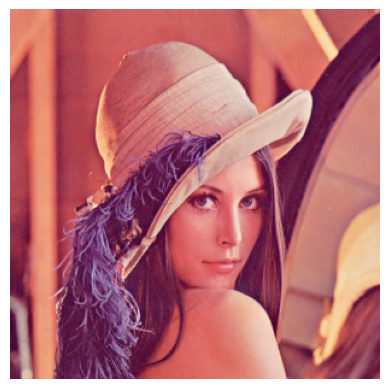

In [12]:
#cv_show(img, 'Original Image')
img_show(img, 1)


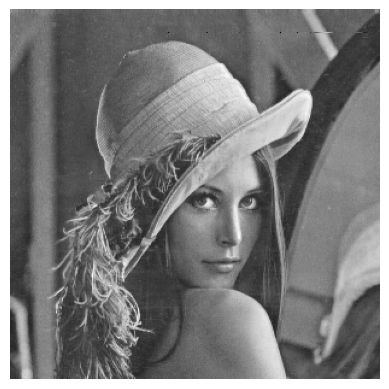

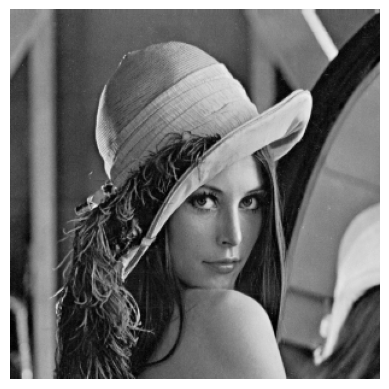

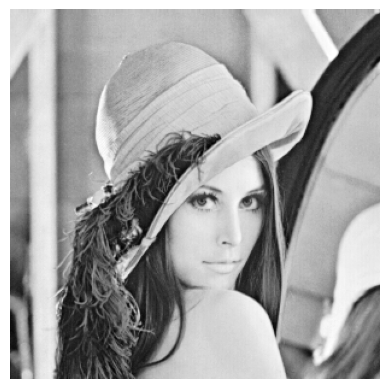

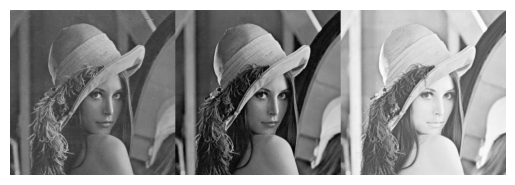

In [13]:
#split image into 3 color space
b, g, r = split_color_space(img)
img_show(b, 0)
img_show(g, 0)
img_show(r, 0)
b_g_r = cv2.hconcat([b, g, r])
img_show(b_g_r, 0)


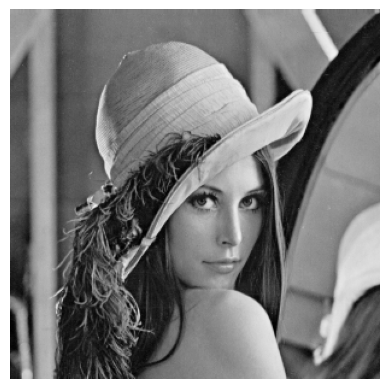

In [14]:
# consider only brightness or intensity
gray = color2gray(img, 0)
img_show(gray, 0)


In [15]:
fp = "./outs/lena_gray_256.png"
save_image(gray, fp)

In [16]:
print(np.amax(gray))

243


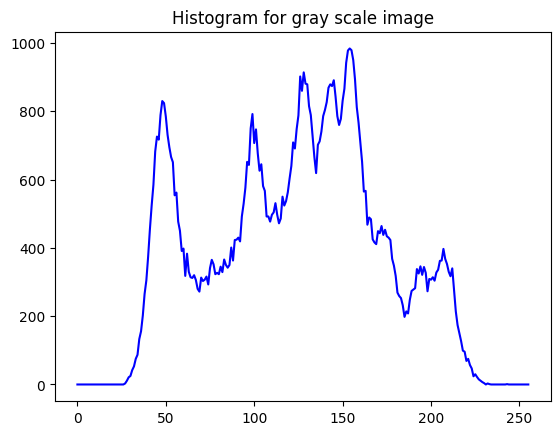

In [17]:
#Show histogram of gray level image
# 1st method
hist= cv2.calcHist([gray], [0], None, [256], [0,256])
plt.plot(hist, color='b')
plt.title('Histogram for gray scale image')
plt.show()


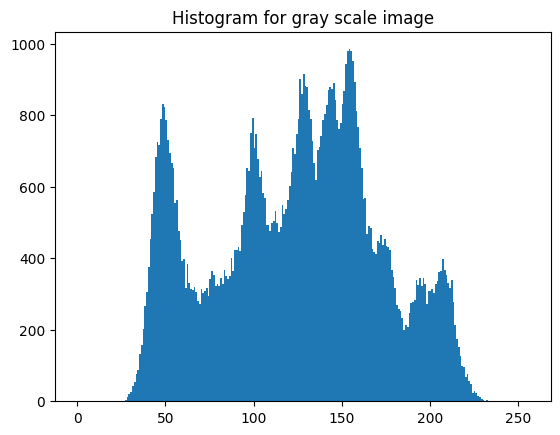

In [18]:
#Show histogram of gray level image
#  2nd method
plt.hist(gray.ravel(),256,[0,256])
plt.title('Histogram for gray scale image')
plt.show()

In [19]:
def color_histogram(image):
    colors = ('b','g','r')
    for i,color in enumerate(colors):
        hist = cv2.calcHist([image],[i],None,[256],[0,256])
        plt.plot(hist,color = color)
    plt.title('Color Image Histogram')
    plt.show()

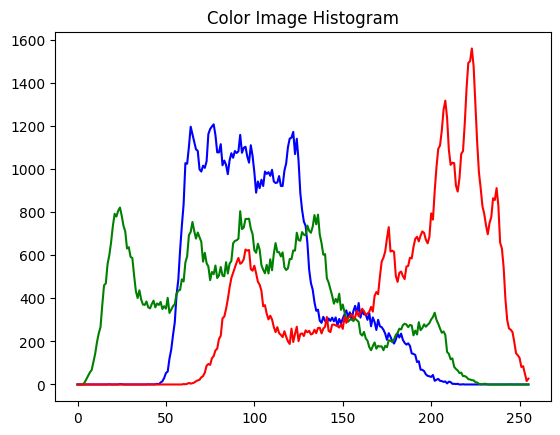

In [20]:
color_histogram(img)

In [ ]:
img = cv2.imread('', 1)